# Energy and market price forecasting using MLPR


# Import the libraries

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

# Loading and preparing the Data

In [2]:
data=pd.read_csv("data.csv",parse_dates=[0])
df = data.set_index("Datetime") # set Datetime as an index
df=df.fillna(df.mean())
df

,Market_price,Actual_load
Datetime,,
2019-01-01 01:00:00,28.32,9920.0
2019-01-01 02:00:00,10.07,9845.0
2019-01-01 03:00:00,10.03,9913.0
2019-01-01 04:00:00,4.56,10027.0
2019-01-01 05:00:00,4.83,9967.0
...,...,...
2020-04-20 16:00:00,8.55,9172.0
2020-04-20 17:00:00,7.06,9179.0
2020-04-20 18:00:00,5.84,9039.0


# Visulaising the data

In [3]:
#Extracting some features from the data
final_df = (df.assign(year = df.index.year
                     ,month = df.index.month
                     ,day = df.index.day
                     ,day_of_year = df.index.dayofyear
                     ,week = df.index.week
                     ,week_day = df.index.weekday_name 
                     ,quarter = df.index.quarter
                     ,hour = df.index.hour)
           )

final_df

,Market_price,Actual_load,year,month,day,day_of_year,week,week_day,quarter,hour
Datetime,,,,,,,,,,
2019-01-01 01:00:00,28.32,9920.0,2019,1,1,1,1,Tuesday,1,1
2019-01-01 02:00:00,10.07,9845.0,2019,1,1,1,1,Tuesday,1,2
2019-01-01 03:00:00,10.03,9913.0,2019,1,1,1,1,Tuesday,1,3
2019-01-01 04:00:00,4.56,10027.0,2019,1,1,1,1,Tuesday,1,4
2019-01-01 05:00:00,4.83,9967.0,2019,1,1,1,1,Tuesday,1,5
...,...,...,...,...,...,...,...,...,...,...
2020-04-20 16:00:00,8.55,9172.0,2020,4,20,111,17,Monday,2,16
2020-04-20 17:00:00,7.06,9179.0,2020,4,20,111,17,Monday,2,17
2020-04-20 18:00:00,5.84,9039.0,2020,4,20,111,17,Monday,2,18


## Visualizing Annual Energy Consumption

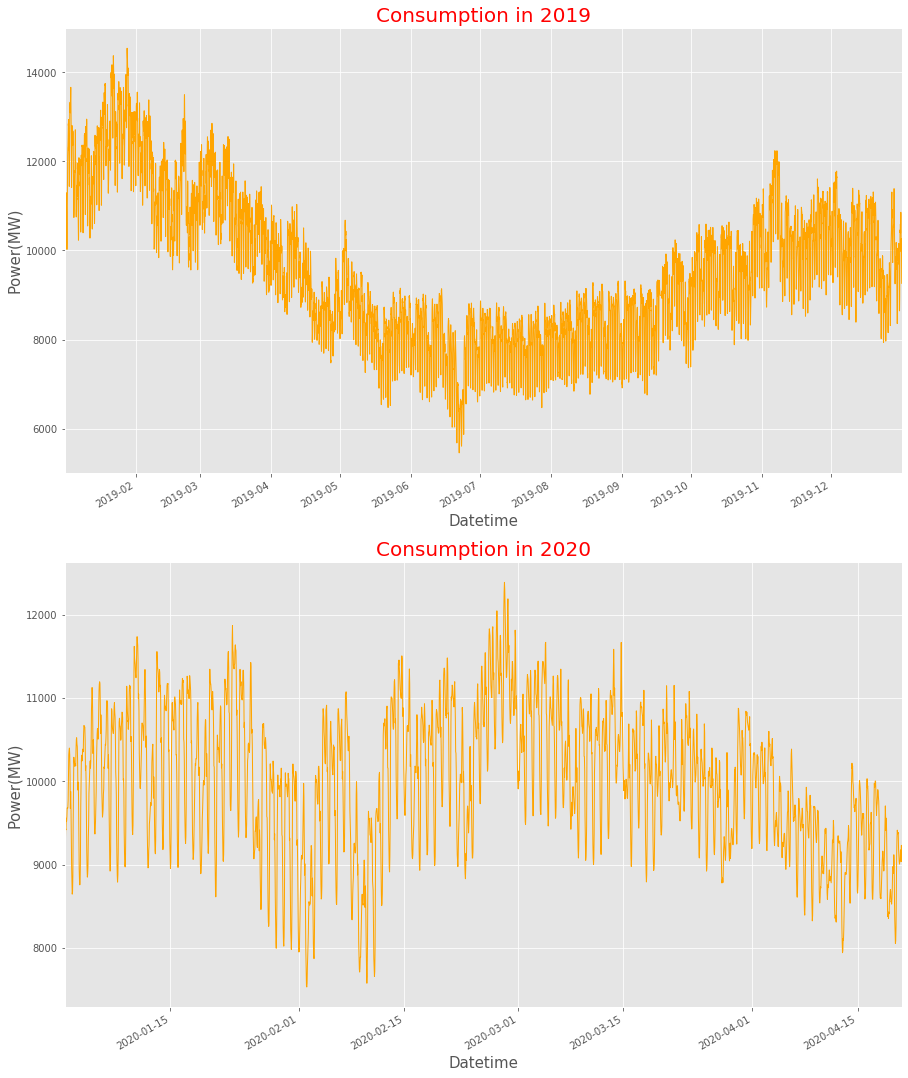

In [18]:
# Visulaise the annual energy consumption
%matplotlib inline
from matplotlib import style
#Defining plotting style
style.use('ggplot')
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,20))

#Plotting 2019,2020 energy consumption
axes[0].set_title('Consumption in 2019',color="red",size=(20))
axes[0].set_ylabel('Power(MW)',size=(15))
axes[0].set_xlabel('Datetime',size=(15))
final_df["2019"]["Actual_load"].plot(ax=axes[0],color="orange", linewidth=1)

axes[1].set_title('Consumption in 2020',color="red",size=(20))
axes[1].set_ylabel('Power(MW)',size=(15))
axes[1].set_xlabel('Datetime',size=(15))
final_df["2020"]["Actual_load"].plot(ax=axes[1],color="orange", linewidth=1)

plt.show()

# Energy Distribution

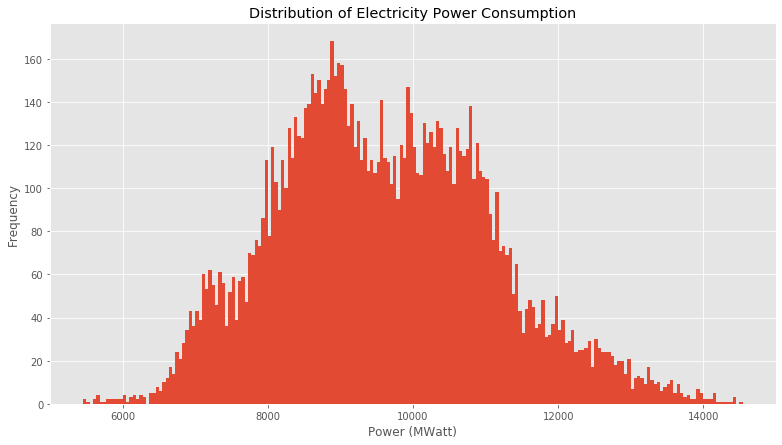

In [19]:
final_df["Actual_load"].plot.hist(figsize=(13, 7), bins=200, title='Distribution of Electricity Power Consumption')
plt.xlabel('Power (MWatt)')
plt.show()

No handles with labels found to put in legend.


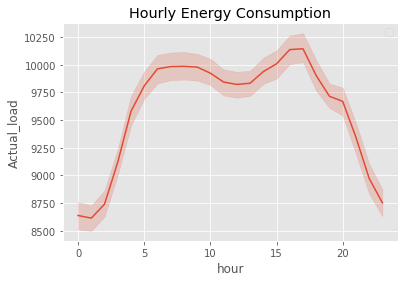

In [20]:
# Viulaise the consumption  with Respect to day time
%matplotlib inline
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=final_df["hour"],y=final_df["Actual_load"], data=df)
plt.title("Hourly Energy Consumption")
plt.xlabel("hour")
plt.grid(True, alpha=1)
plt.legend()
plt.show()

## Energy Forecasting using MLPR

In [9]:
#Importing librarires
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [94]:
#Actual load of year 2019
load19=final_df.loc[final_df['year'].isin([2019])].iloc[:,1]

#2019 year Features for training the model
features=pd.concat([final_df.iloc[:,0],final_df.iloc[:,2:]],axis=1)
features['week_day'] = features['week_day'].map({'Monday':1,'Tuesday': 2,'Wednesday':3,
                                             'Thursday':4,'Friday':5, 
                                             'Saturday': 6,'Sunday':7})
feature19=features.loc[features['year'].isin([2019])].fillna(features.mean())
feature19

,Market_price,year,month,day,day_of_year,week,week_day,quarter,hour
Datetime,,,,,,,,,
2019-01-01 01:00:00,28.32,2019,1,1,1,1,2,1,1
2019-01-01 02:00:00,10.07,2019,1,1,1,1,2,1,2
2019-01-01 03:00:00,10.03,2019,1,1,1,1,2,1,3
2019-01-01 04:00:00,4.56,2019,1,1,1,1,2,1,4
2019-01-01 05:00:00,4.83,2019,1,1,1,1,2,1,5
...,...,...,...,...,...,...,...,...,...
2019-12-31 20:00:00,33.89,2019,12,31,365,1,2,4,20
2019-12-31 20:55:00,30.23,2019,12,31,365,1,2,4,20
2019-12-31 22:00:00,29.94,2019,12,31,365,1,2,4,22


In [95]:
#Removing less important features
cols = [1,4,5,7]
feature19=feature19.drop(feature19.columns[cols],axis=1)
feature19

,Market_price,month,day,week_day,hour
Datetime,,,,,
2019-01-01 01:00:00,28.32,1,1,2,1
2019-01-01 02:00:00,10.07,1,1,2,2
2019-01-01 03:00:00,10.03,1,1,2,3
2019-01-01 04:00:00,4.56,1,1,2,4
2019-01-01 05:00:00,4.83,1,1,2,5
...,...,...,...,...,...
2019-12-31 20:00:00,33.89,12,31,2,20
2019-12-31 20:55:00,30.23,12,31,2,20
2019-12-31 22:00:00,29.94,12,31,2,22


In [11]:
#libraries for MLPR and accuracies check
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#Splitting data into train and test set
X_train,X_test,y_train,y_test=train_test_split(feature19,load19,train_size=0.75,random_state=0)
#Defining mlpr model
mlp=Pipeline([('Scaling',StandardScaler()),
              ('MLPR',MLPRegressor(hidden_layer_sizes=(20,15,10,5),activation='relu',
                    solver='lbfgs',max_iter=1000,random_state=0))])

#Fitting features with target variable
mlp.fit(X=X_train, y=y_train)
#Predicting training set
yhat=mlp.predict(X_train)
#Checking accuracy of the model
RsquaredCV=cross_val_score(mlp, X_train, y_train, cv=5).mean()
RsquaredTR=mlp.score(X_train,y_train)
#Plotting model performance
sns.regplot(x=y_train,y=yhat, line_kws={"color": "red"},scatter_kws={"color": "green"})
plt.xlabel('True load')
plt.ylabel('Predicted load')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)
plt.show()
#Predicting test variable to check test accuracy
ypr_t=mlp.predict(X_test)
#Accuracy scores
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)
print("Test score........",r2_score(y_true=y_test,y_pred=ypr_t))

NameError: name 'load19' is not defined

In [21]:
from matplotlib.legend_handler import HandlerLine2D
from pandas.plotting import register_matplotlib_converters
#Forecasting 2019 energy consumption
y_pre=mlp.predict(feature19)
ytrue=load19
y_pre=pd.DataFrame(y_pre,columns=['Predicted Energy'])
y_pre.index=ytrue.index

#Plotting 2018 yearly consumption
plt.figure(figsize=(20,10))
line1,=plt.plot(ytrue,'r',label='Actual')
line2,=plt.plot(y_pre,'g',label='Predicted')
plt.xlabel('Date')
plt.ylabel('Energy MWh')
plt.title('MLP Regressor')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()

NameError: name 'load19' is not defined

In [22]:
#Actual load of year 2020 march and april
load20=final_df.loc[final_df['year'].isin([2020])]
load_march=load20.loc[load20['month'].isin([3])].iloc[:,1] #March 2020 actual load
load_april=load20.loc[load20['month'].isin([4])].iloc[:,1] #April 2020 actual load
load20=load20.iloc[:,1]
#2020 year features for predicting energy of year 2020
feature20=features.loc[features['year'].isin([2020])].fillna(features.mean())

#Extracting march features
feature_march=feature20.loc[feature20['month'].isin([3])]
#Extracting april features
feature_april=feature20.loc[feature20['month'].isin([4])]
feature_april

#Removing less important features
feature_march=feature_march.drop(feature_march.columns[cols],axis=1)
feature_april=feature_april.drop(feature_april.columns[cols],axis=1)
feature20=feature20.drop(feature20.columns[cols],axis=1)
feature20

,Actual_load,month,day,week_day,hour
Datetime,,,,,
2020-01-01 01:00:00,9141.0,1,1,3,1
2020-01-01 02:00:00,9149.0,1,1,3,2
2020-01-01 03:00:00,9206.0,1,1,3,3
2020-01-01 04:00:00,9432.0,1,1,3,4
2020-01-01 05:00:00,9419.0,1,1,3,5
...,...,...,...,...,...
2020-04-20 16:00:00,9172.0,4,20,1,16
2020-04-20 17:00:00,9179.0,4,20,1,17
2020-04-20 18:00:00,9039.0,4,20,1,18


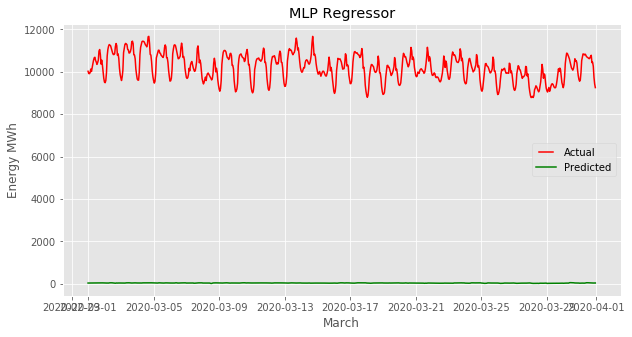

In [23]:
#Forecasting 2020 march energy consumption
y_pre=mlp.predict(feature_march)
ytrue=load_march
y_pre=pd.DataFrame(y_pre,columns=['Predicted Energy'])
y_pre.index=ytrue.index

#Plotting predicted march energy 2020
plt.figure(figsize=(10,5))
line1,=plt.plot(ytrue,'r',label='Actual')
line2,=plt.plot(y_pre,'green',label='Predicted')
plt.xlabel('March')
plt.ylabel('Energy MWh')
plt.title('MLP Regressor')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.savefig("pic.jpg")
plt.show()

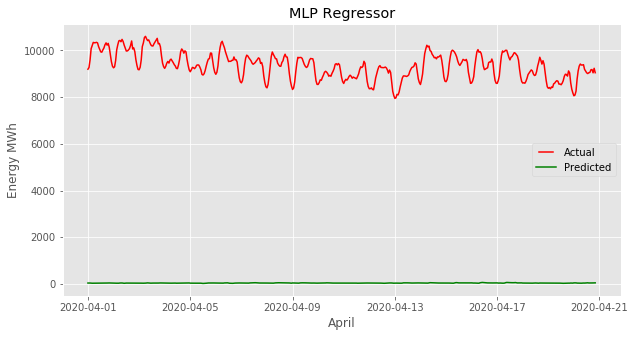

In [24]:
#Forecasting 2020 april energy consumption
y_pre=mlp.predict(feature_april)
ytrue=load_april
y_pre=pd.DataFrame(y_pre,columns=['Predicted Energy'])
y_pre.index=ytrue.index

#Plotting predicted april energy 2020
plt.figure(figsize=(10,5))
line1,=plt.plot(ytrue,'r',label='Actual')
line2,=plt.plot(y_pre,'green',label='Predicted')
plt.xlabel('April')
plt.ylabel('Energy MWh')
plt.title('MLP Regressor')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()

## Visualizing Annual Market price

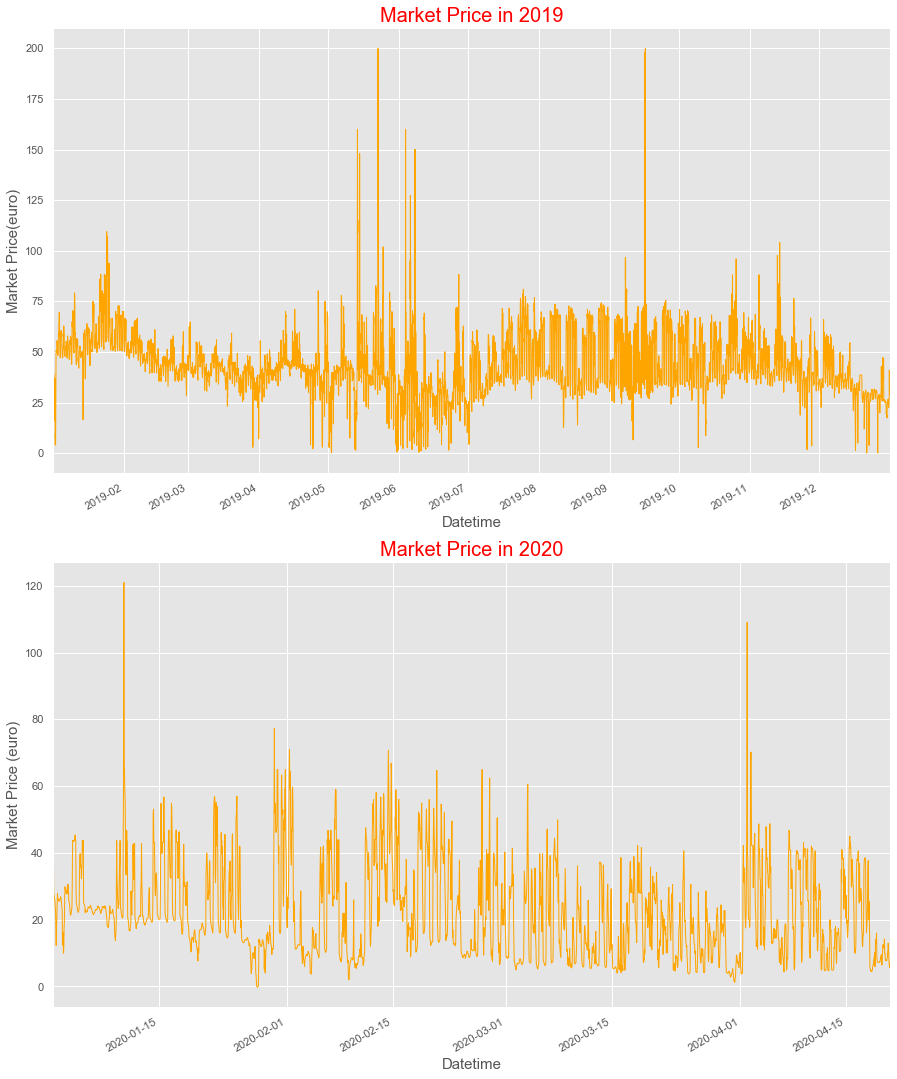

In [102]:
# Visulaise the annual energy consumption
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15,20))

axes[0].set_title('Market Price in 2019',color="red",size=(20))
axes[0].set_ylabel('Market Price(euro)',size=(15))
axes[0].set_xlabel('Datetime',size=(15))
final_df["2019"]["Market_price"].plot(ax=axes[0],color="orange", linewidth=1)

axes[1].set_title('Market Price in 2020',color="red",size=(20))
axes[1].set_ylabel('Market Price (euro)',size=(15))
axes[1].set_xlabel('Datetime',size=(15))
final_df["2020"]["Market_price"].plot(ax=axes[1],color="orange", linewidth=1)
#plt.tight_layout()
plt.show()

## Market Price Distribution

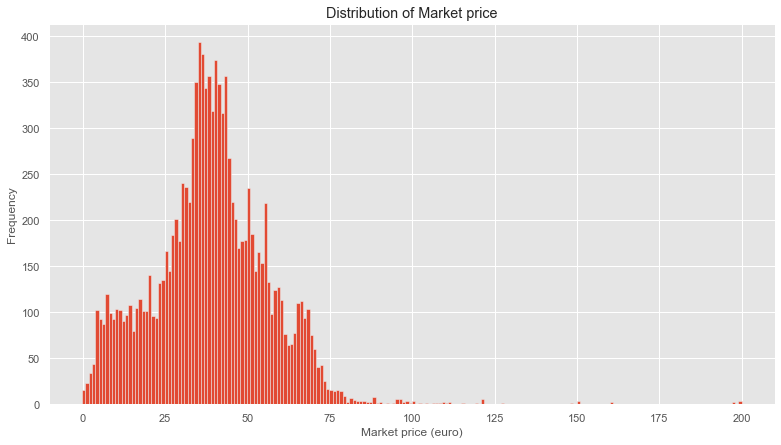

In [103]:
final_df["Market_price"].plot.hist(figsize=(13, 7), bins=200, title='Distribution of Market price')
plt.xlabel('Market price (euro)')
plt.show()

No handles with labels found to put in legend.


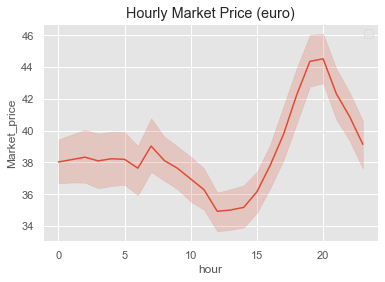

In [104]:
# Viulaise the consumption  with Respect to day time
%matplotlib inline
fig = plt.figure()
ax1= fig.add_subplot(111)

sns.lineplot(x=final_df["hour"],y=final_df["Market_price"], data=df)
plt.title("Hourly Market Price (euro)")
plt.xlabel("hour")
plt.grid(True, alpha=1)
plt.legend()
plt.show()

## Market price forecasting using MLPR

In [6]:
#Actual market price of year 2019
mrk_prc19=final_df.loc[final_df['year'].isin([2019])].iloc[:,0].fillna(final_df.iloc[:,0].mean())

# 2019 year Features for training the model
features=final_df.iloc[:,1:]

#mapping weekday names against numbers
features['week_day'] = features['week_day'].map({'Monday':1,'Tuesday': 2,'Wednesday':3,
                                             'Thursday':4,'Friday':5, 
                                             'Saturday': 6,'Sunday':7})
feature19=features.loc[features['year'].isin([2019])]
feature19

,Actual_load,year,month,day,day_of_year,week,week_day,quarter,hour
Datetime,,,,,,,,,
2019-01-01 01:00:00,9920.0,2019,1,1,1,1,2,1,1
2019-01-01 02:00:00,9845.0,2019,1,1,1,1,2,1,2
2019-01-01 03:00:00,9913.0,2019,1,1,1,1,2,1,3
2019-01-01 04:00:00,10027.0,2019,1,1,1,1,2,1,4
2019-01-01 05:00:00,9967.0,2019,1,1,1,1,2,1,5
...,...,...,...,...,...,...,...,...,...
2019-12-31 20:00:00,10262.0,2019,12,31,365,1,2,4,20
2019-12-31 20:55:00,10229.0,2019,12,31,365,1,2,4,20
2019-12-31 22:00:00,9822.0,2019,12,31,365,1,2,4,22


In [7]:
#Removing less important features
cols = [1,4,5,7]
feature19=feature19.drop(feature19.columns[cols],axis=1)
feature19

,Actual_load,month,day,week_day,hour
Datetime,,,,,
2019-01-01 01:00:00,9920.0,1,1,2,1
2019-01-01 02:00:00,9845.0,1,1,2,2
2019-01-01 03:00:00,9913.0,1,1,2,3
2019-01-01 04:00:00,10027.0,1,1,2,4
2019-01-01 05:00:00,9967.0,1,1,2,5
...,...,...,...,...,...
2019-12-31 20:00:00,10262.0,12,31,2,20
2019-12-31 20:55:00,10229.0,12,31,2,20
2019-12-31 22:00:00,9822.0,12,31,2,22


CV score.......... 0.6162378037361698
Training score.... 0.7411835999107136
Test score........ 0.6443822105788584


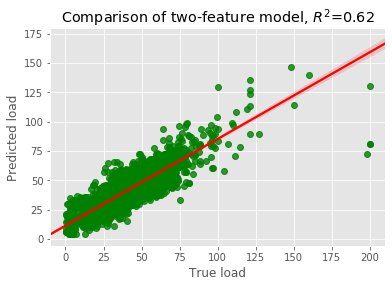

In [16]:
from sklearn.neural_network import MLPRegressor
from sklearn import datasets
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import cross_val_score

#Splitting data into train and test set
X_train,X_test,y_train,y_test=train_test_split(feature19,mrk_prc19,train_size=0.75,random_state=0)

#Defining mlpr model
mlp=Pipeline([('Scaling',StandardScaler()),
              ('MLPR',MLPRegressor(hidden_layer_sizes=(20,15,10,5),activation='relu',
                    solver='lbfgs',max_iter=5000,random_state=0))])

#Fitting features with target variable
mlp.fit(X=X_train, y=y_train)
#Predicting training set
yhat=mlp.predict(X_train)
#Checking accuracy of the model
RsquaredCV=cross_val_score(mlp, X_train, y_train, cv=5).mean()
RsquaredTR=mlp.score(X_train,y_train)

#Plotting model performance
sns.regplot(x=y_train,y=yhat, line_kws={"color": "red"},scatter_kws={"color": "green"})
plt.xlabel('True load')
plt.ylabel('Predicted load')
plt.title('Comparison of two-feature model, $R^2$=%3.2f' % RsquaredCV)

#Predicting test variable to check test accuracy
yhat=mlp.predict(X_test)

#Accuracy scores
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)
print("Test score........",r2_score(y_true=y_test,y_pred=yhat))

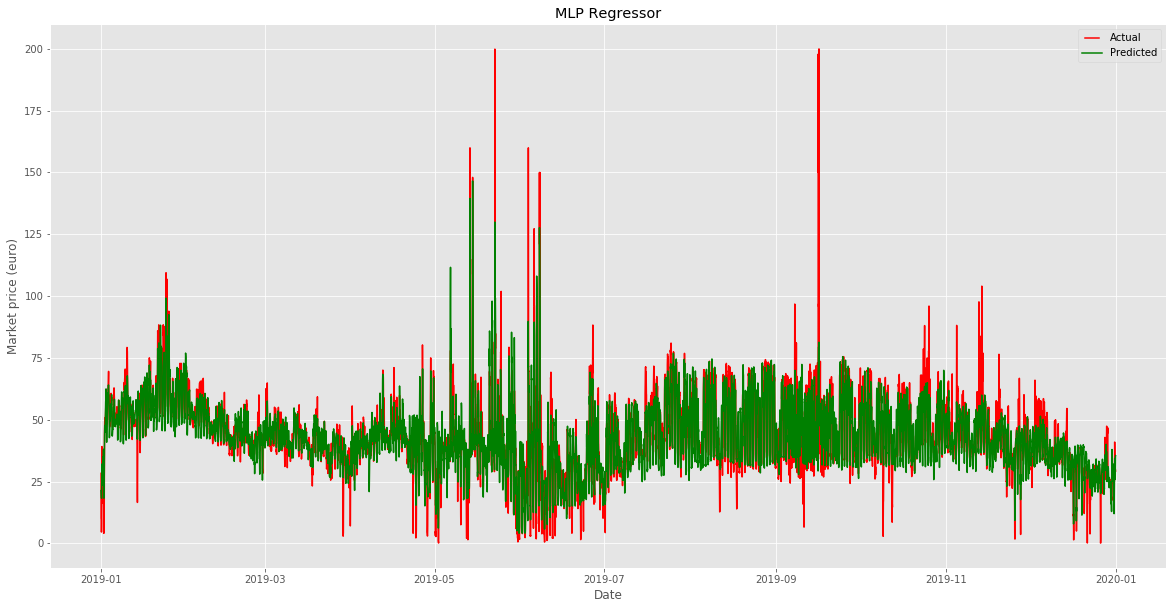

In [32]:
#Forecasting market price of year 2019
y_pre=mlp.predict(feature19)
ytrue=mrk_prc19
y_pre=pd.DataFrame(y_pre,columns=['Predicted market price'])
y_pre.index=ytrue.index

#Plotting predicted marker price 2019
plt.figure(figsize=(20,10))
line1,=plt.plot(ytrue,'r',label='Actual')
line2,=plt.plot(y_pre,'g',label='Predicted')
plt.xlabel('Date')
plt.ylabel('Market price (euro)')
plt.title('MLP Regressor')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()

In [33]:
#Actual marketprice of year 2020 march and april
mrk_prc20=final_df.loc[final_df['year'].isin([2020])].fillna(final_df.mean())
prc_march=mrk_prc20.loc[mrk_prc20['month'].isin([3])].iloc[:,0] #March 2020 actual market price
prc_april=mrk_prc20.loc[mrk_prc20['month'].isin([4])].iloc[:,0] #April 2020 actual market price
mrk_prc20=mrk_prc20.iloc[:,0]

#2020 year features for predicting energy of year 2020
feature20=features.loc[features['year'].isin([2020])].fillna(features.mean())

#Extracting march 2020 features
feature_march=feature20.loc[feature20['month'].isin([3])]
#Extracting april 2020 features
feature_april=feature20.loc[feature20['month'].isin([4])]

#Removing less important features
feature_march=feature_march.drop(feature_march.columns[cols],axis=1)
feature_april=feature_april.drop(feature_april.columns[cols],axis=1)
feature20=feature20.drop(feature20.columns[cols],axis=1)
feature20

,Actual_load,month,day,week_day,hour
Datetime,,,,,
2020-01-01 01:00:00,9141.0,1,1,3,1
2020-01-01 02:00:00,9149.0,1,1,3,2
2020-01-01 03:00:00,9206.0,1,1,3,3
2020-01-01 04:00:00,9432.0,1,1,3,4
2020-01-01 05:00:00,9419.0,1,1,3,5
...,...,...,...,...,...
2020-04-20 16:00:00,9172.0,4,20,1,16
2020-04-20 17:00:00,9179.0,4,20,1,17
2020-04-20 18:00:00,9039.0,4,20,1,18


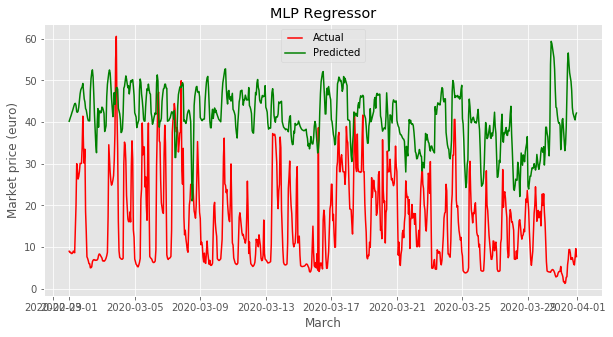

In [34]:
#Forecasting market price of march 2020
y_pre=mlp.predict(feature_march)
ytrue=prc_march
y_pre=pd.DataFrame(y_pre,columns=['Predicted market price'])
y_pre.index=ytrue.index

#Plotting predicted march market price 2020
plt.figure(figsize=(10,5))
line1,=plt.plot(ytrue,'r',label='Actual')
line2,=plt.plot(y_pre,'green',label='Predicted')
plt.xlabel('March')
plt.ylabel('Market price (euro)')
plt.title('MLP Regressor')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()

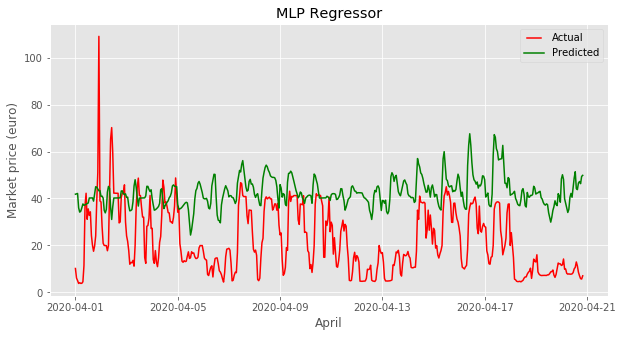

In [28]:
#Forecasting market price of april 2020
y_pre=mlp.predict(feature_april)
ytrue=prc_april
y_pre=pd.DataFrame(y_pre,columns=['Predicted market price'])
y_pre.index=ytrue.index

#Plotting predicted april market price 2020
plt.figure(figsize=(10,5))
line1,=plt.plot(ytrue,'r',label='Actual')
line2,=plt.plot(y_pre,'green',label='Predicted')
plt.xlabel('April')
plt.ylabel('Market price (euro)')
plt.title('MLP Regressor')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
plt.show()